In [1]:
#Imports
from AMLsim2graph import read_AMLsim_and_compute_graph


In [2]:
accounts_dir = "../datasets/1K/accounts.csv"
transactions_dir = "../datasets/1K/transactions.csv"



In [3]:
A1, A2, results = read_AMLsim_and_compute_graph(accounts_dir, transactions_dir)


Number of nodes: 1446
Number of edges: 121457
Number of nodes (after removing isolated nodes): 1354
Number of nodes: 1354
Number of edges: 6984


root - INFO - Generating 1-th null model
/Users/julienschmidt/anaconda3/envs/GDL/lib/python3.10/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)
root - INFO - Generating 2-th null model
root - INFO - Generating 3-th null model
root - INFO - Generating 4-th null model
root - INFO - Generating 5-th null model
root - INFO - Generating 6-th null model
root - INFO - Generating 7-th null model
root - INFO - Generating 8-th null model
root - INFO - Generating 9-th null model
root - INFO - Generating 10-th null model
root - INFO - Generating 11-th null model
root - INFO - Generating 12-th null model
root - INFO - Generating 13-th null model
root - INFO - Generating 14-th null model
root - INFO - Generating 15-th null model
root - INFO - Generating 16-th null model
root - INFO - Generating 17-th null model
root - INFO - Generating 18-th nul

DiGraph with 1354 nodes and 6984 edges
{'initial_deposit': 96646.86, 'is_sar': False, 'GAW': 0, 'GAW10': 0, 'GAW20': 0, 'Std Degree': -0.19606735154538282, 'first_density': 6.347451161378977, 'second_density': 0.10943881312722374, 'third_density': 1.562386123826156, 'small_community': 0, 'first_strength': 3.292122732349915, 'second_strength': 0.05676073676465371}
Created new graph saved to ../datasets/1K/accounts_digraph_form.csv ../datasets/1K/transactions_digraph_form.csv


In [7]:
import pandas as pd
nodes_df = pd.DataFrame.from_dict(dict(A1.nodes(data=True)), orient='index')
nodes_df.head()

,initial_deposit,is_sar,GAW,GAW10,GAW20,Std Degree,first_density,second_density,third_density,small_community
0,96646.86,False,0.000000,0.0,0.0,-0.196067,6.347451,0.109439,1.838860,0.056761
1,80707.36,False,1.852625,0.0,0.0,0.467805,7.208831,0.150184,2.618594,0.069368
2,52101.10,False,0.000000,0.0,0.0,0.430923,6.001972,0.100033,1.526128,0.047135
3,90324.40,False,0.000000,0.0,0.0,2.533186,12.913645,0.496679,7.782591,0.125234
4,91267.86,False,0.000000,0.0,0.0,2.496304,6.001972,0.100033,1.526128,0.047135


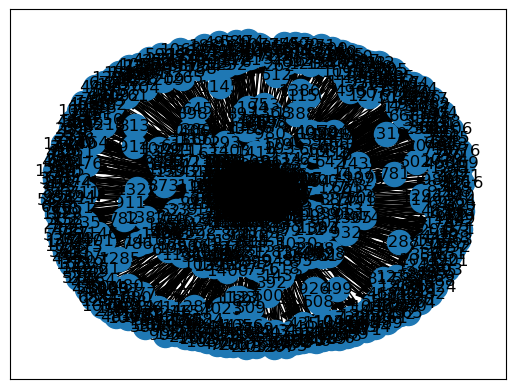

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

g.nodes[0]['is_sar']

node_colors = ['red' if g.nodes[n]['is_sar'] else 'blue' for n in g.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(g)
#nx.draw(g, pos, with_labels=True, node_color=node_colors)
#nx.draw_networkx(nx.relabel_nodes(g, nx.get_node_attributes(g, 'is_sar')),     with_labels=True, node_color = 'orange')
nx.draw_networkx(g)

# Show the graph
plt.show()

In [72]:
import numpy as np
g.nodes.data()
node_features = np.array([list(g.nodes.data()[node].values()) for node in g.nodes])
print(node_features)
print(g.nodes.data()[0])
g.nodes.data()

for node in g.nodes:
    print(node)
    
    print(list(g.nodes.data()[node].values()))
    break

[[ 0.          0.          0.         -0.19606735]
 [ 2.25889444  0.          0.          0.46780504]
 [ 0.          0.          0.          0.43092324]
 ...
 [ 3.1596164   3.1596164   3.1596164  -0.34359455]
 [ 2.60028026  2.60028026  2.60028026 -0.34359455]
 [ 3.11505955  3.11505955  3.11505955 -0.34359455]]
{'gaw_score': 0, 'gaw10_score': 0, 'gaw20_score': 0, 'degree_std': -0.19606735154538282}
0
[0, 0, 0, -0.19606735154538282]


In [73]:
import sys
sys.path.insert(1, '../packages/Elliot19_other_repo')
import basicTests.basictest as bt

In [77]:
import networkx as nx
H = nx.convert_node_labels_to_integers(g2, first_label=0)

In [78]:
prev = 0
for y in H:
    if y-prev>1:
        print(prev, y)
    prev = y

In [79]:
results = {}
results['GAW']    = bt.strengthDegree(H,1000,0.05)[0][2]
results['GAW10']  = bt.strengthDegree10(H,1000,0.05)[0][2]
results['GAW20']  = bt.strengthDegree20(H,1000,0.05)[0][2]
results['Std Degree']  = bt.getTotalDegree(H)[0][1]

In [109]:
a = np.array(list(results['Std Degree'].values()))
b = node_features[:,3]

len(a) ,len(b)

a[300:310], b[300:310]

(array([-0.23294915, -0.23294915, -0.23294915, -0.26983095, -0.23294915,
        -0.23294915, -0.19606735, -0.19606735, -0.23294915, -0.23294915]),
 array([-0.23294915, -0.23294915, -0.23294915, -0.26983095, -0.23294915,
        -0.23294915, -0.19606735, -0.19606735, -0.23294915, -0.23294915]))

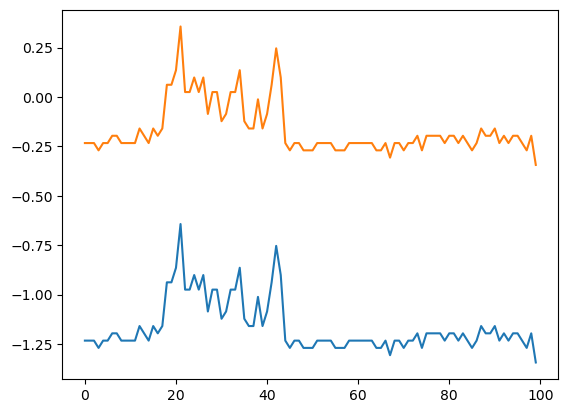

In [111]:
import matplotlib.pyplot as plt

plt.plot(a[300:400]-1)
plt.plot(b[300:400])
plt.show()

In [15]:
import sys
sys.path.insert(1, '../packages/Elliot19_reproduce')
from basic_test import basic_features
from com_detection import community_detection
from utils import generate_null_models, get_parameters

In [10]:
num_models = 1              # number of artificial graphs created
num_nodes = 1000            # number of graph's nodes
num_basic_mc_samples = 500  # number of replicas from the model, which 
                            # fixes the degrees and randomly shuffles weights
num_references = 10         # WHAT
num_null_models = 60        # WHAT


In [16]:
G = basic_features(g, num_samples=1000)

root - INFO - Average degree = 9.659751037344398
root - INFO - Std degree = 26.357482285184467
root - INFO - Running Monte-Carlo simulations


FloatingPointError: invalid value encountered in double_scalars

In [10]:
_, references = generate_null_models(g, num_models=num_references, min_size=20)
null_samples_whole, null_samples = generate_null_models(g, num_models=num_null_models, min_size=20)

root - INFO - Generating 1-th null model
/Users/julienschmidt/anaconda3/envs/GDL/lib/python3.10/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)
root - INFO - Generating 2-th null model
root - INFO - Generating 3-th null model
root - INFO - Generating 4-th null model
root - INFO - Generating 5-th null model
root - INFO - Generating 6-th null model
root - INFO - Generating 7-th null model
root - INFO - Generating 8-th null model
root - INFO - Generating 9-th null model
root - INFO - Generating 10-th null model
root - INFO - Generating 1-th null model
root - INFO - Generating 2-th null model
root - INFO - Generating 3-th null model
root - INFO - Generating 4-th null model
root - INFO - Generating 5-th null model
root - INFO - Generating 6-th null model
root - INFO - Generating 7-th null model
root - INFO - Generating 8-th null model


In [8]:
graph = community_detection(g, null_samples, num_samples=20)

NameError: name 'null_samples' is not defined

In [7]:
g[0]

AtlasView({19: {'weight': 46768}, 20: {'weight': 43773}, 211: {'weight': 9541}})